# Lineární algebra


In [ ]:
!python -m pip install numpy

In [ ]:
!python -m pip install scipy

In [13]:
#pro apple silicon architektury
#!python -m pip install --pre -i https://pypi.anaconda.org/scipy-wheels-nightly/simple scipy

#### Co známe:
- pole numpy
  - konverze seznam - pole (np.array, list)
  - přičtení skaláru a násobení skalárem
  - sčítání a násobení polí
  - tvar a jeho změna (shape, reshape)
  - broadcasting (např. matice + vektor)
  - tvoření matic pomocí funkcí
  - maticové násobení
  - práce se soubory
- základy lineární algebry
  - determinant
  - hodnost
  - stopa
  - inverze

## Vektory

### 1: Reprezentace vektoru

In [1]:
import numpy as np

# naivní způsob
a = [1, 3, 2]
b = [4, 2, 1]
soucin = [a[i] * b[i] for i in range(min(len(a), len(b)))]
print("součin složek:", soucin)

# numpy
a = np.array([1, 3, 2])
b = np.array([4, 2, 1])
soucin = a * b
print("součin složek:", soucin)

součin složek: [4, 6, 2]
součin složek: [4 6 2]


### 2: Práce s vektory

In [2]:
# škálování vektoru (násobení skalárem)
alfa = 0.5
a = np.array([1, 3, 2])
print(alfa*a)

[0.5 1.5 1. ]


In [16]:
# sčítání vektorů
a = np.array([1, 3, 2])
b = np.array([4, 2, 1])
print(a+b)

[5 5 3]


In [17]:
# násobení složek vektorů
a = np.array([1, 3, 2])
b = np.array([4, 2, 1])
print(a*b)

[4 6 2]


In [18]:
# podíl složek vektorů
a = np.array([1, 3, 2])
b = np.array([4, 2, 1])
print(a/b)

[0.25 1.5  2.  ]


#### Generování vektoru
- ekvidistantní (numpy.arange)
- náhodná celá čísla (numpy.random.randint)
- náhodná desetinná čísla (numpy.random.random)
- náhodná čísla z normálního rozdělení (numpy.random.randn)
- ...

In [3]:
# generovani ekvidistantního vektoru
zacatek = 4
konec = 16
inkrement = 2
ekvidistantni_vektor = np.arange(zacatek, konec, inkrement)
print(ekvidistantni_vektor)

[ 4  6  8 10 12 14]


In [20]:
# generování náhodného vektoru celých čísel
nahodny_vektor = np.random.randint(1, 5, size=10)       # 10 čísel 1 až 4
print(nahodny_vektor)

[4 3 3 2 4 4 4 1 3 2]


In [21]:
# generování náhodného vektoru desetinných čísel
nahodny_vektor = np.random.random(10)                   # od 0 do 1
print(nahodny_vektor)

[0.81898072 0.7449855  0.74071673 0.66987502 0.09139195 0.86480551
 0.77844311 0.65680169 0.76184794 0.08237183]


In [2]:
# generování náhodného vektoru ze standardního rozdělení
nahodny_vektor = np.random.randn(100)                   # N(0, 1)
stredni_hodnota = nahodny_vektor.mean()
smerodatna_odchylka = nahodny_vektor.std()
print("mean: ", stredni_hodnota, "stdev:", smerodatna_odchylka)


mean:  -0.051573683932249044 stdev: 1.0082885306986011


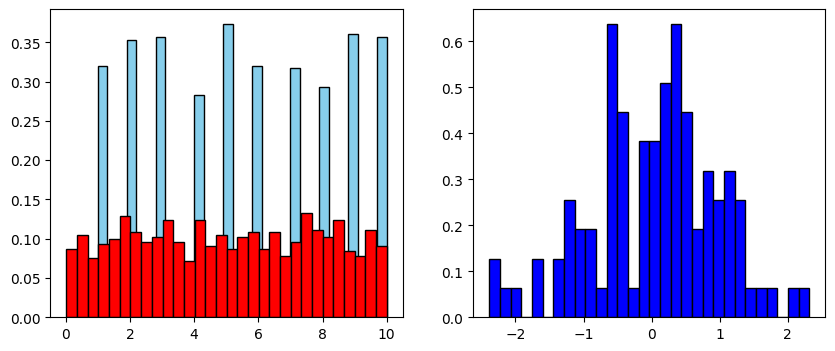

In [3]:
import matplotlib.pyplot as plt
r_int = np.random.randint(1, 11, size=1000)         # 1000 čísel 1 až 10
r_flt = np.random.random(1000)                      # 1000 čísel od 0 do 1
r_norm = np.random.randn(100)                       # 100 čísel N(0, 1)

# Histogram
plt.figure(figsize=(10, 4))

# levý graf
plt.subplot(1, 2, 1)            
plt.hist(r_int, bins=30, density=True, color='skyblue', edgecolor='black')  # int
plt.hist(r_flt*10, bins=30, density=True, color='red', edgecolor='black')   # float

# pravý graf
plt.subplot(1, 2, 2)
plt.hist(r_norm, bins=30, density=True, color='blue', edgecolor='black')    # Gauss
plt.show()

#### Ověření, že data odpovídají rozdělení
scipy.stats.probplot 
- vizualizace a analýza, zda data pocházejí z určitého teoretického rozdělení
- vytváří Q-Q plot (quantile-quantile plot) - porovnává kvantily vstupních dat s kvantily teoretického rozdělení

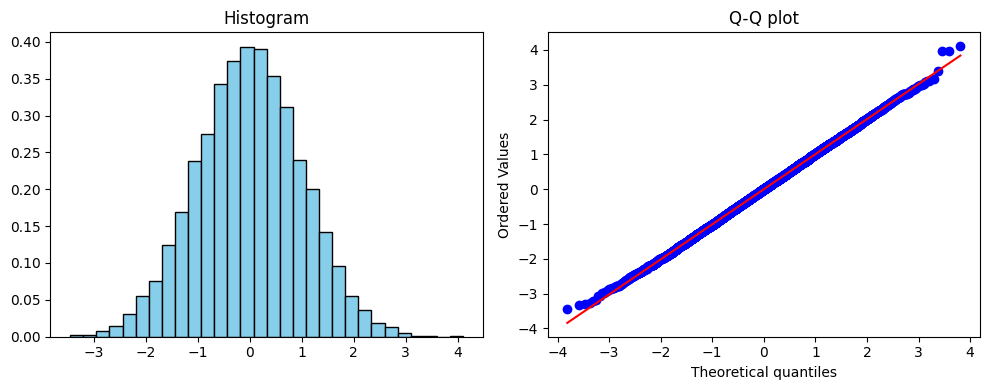

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generování náhodných dat z normálního rozdělení
data = np.random.normal(loc=0, scale=1, size=10000)

# Histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram')

# Graf Q-Q
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
#stats.probplot(data, dist=stats.loggamma, sparams=(2.5,), plot=plt)

plt.tight_layout()
plt.show()

### 3: Skalární součin


<!--img src="MS4_soubory/skalarni_soucin.png" alt="Drawing" style="width: 550px;"/-->

$$
\begin{align}
S&=a⋅b=a_1b_1+a_2b_2+a_3b_3 \\
S&=a⋅b=|a| |b| cos(\phi), \quad \quad \phi ∈ <0, \pi>
\end{align}
$$

In [7]:
a = np.array([1, 3, 2])
b = np.array([4, 2, 1])

print(np.dot(a, b))
print(a.dot(b))
print(a @ b)


12
12
12


Skalární násobení se používá i pro maticové násobení (viz dále)
- matice . matice
- matice . vektor

In [8]:
#velikost vektoru pomoci skalarniho soucinu
a = np.array([1, 3, 2])

velikost = np.sqrt(a.dot(a))
print(velikost)

velikost = np.linalg.norm(a)
print(velikost)

3.7416573867739413
3.7416573867739413


### 4: Vektorový součin


<!--img src="MS4_soubory/vektorovy_soucin.png" alt="Drawing" style="width: 600px;"/-->

$$
\begin{align}

\mathbf{c} &= \mathbf{a} \times \mathbf{b} \\

\mathbf{c} &= \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
\end{vmatrix}

= \left( \left| \begin{matrix} a_2 & a_3 \\ b_2 & b_3 \end{matrix} \right|, \left| \begin{matrix} a_3 & a_1 \\ b_3 & b_1 \end{matrix} \right|, \left| \begin{matrix} a_1 & a_2 \\ b_1 & b_2 \end{matrix} \right| \right)

\end{align}

$$

In [9]:
a = np.array([1, 3, 2])
b = np.array([4, 2, 1])

vektorovy_soucin = np.cross(a, b)
print(vektorovy_soucin)

[ -1   7 -10]


### 5: Tenzorový součin

$$
\mathbf{a} \otimes \mathbf{b} = \mathbf{a} \mathbf{b} = \begin{pmatrix}
a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
\vdots & \vdots & \ddots & \vdots \\
a_m b_1 & a_m b_2 & \cdots & a_m b_n \\
\end{pmatrix}
$$

<!--img src="MS4_soubory/tenzorovy_soucin.png" alt="Drawing" style="width: 600px;"/-->

In [10]:
a = np.array([1, 3, 2])
b = np.array([4, 2, 1])

tenzorovy_soucin = np.tensordot(a, b, axes=0)
print(tenzorovy_soucin)

[[ 4  2  1]
 [12  6  3]
 [ 8  4  2]]


## Matice

### 6: Práce s maticí

In [11]:
#standardni zpusob vytvareni matic
matice = np.array([
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
])
print(matice)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [30]:
# matice plná jedniček
nradku = 4
nsloupcu = 3
matice_jednicky = np.ones((nradku, nsloupcu))
print(matice_jednicky)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [31]:
# matice plná nul
nradku = 4
nsloupcu = 3
matice_nuly = np.zeros((nradku, nsloupcu))
print(matice_nuly)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [32]:
# matice plná libovolné hodnoty
nradku = 4
nsloupcu = 3
matice = np.full((nradku, nsloupcu), 5, dtype='float')
print(matice)

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


In [12]:
# změna tvaru matice
matice = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12]
])
stary_tvar = matice.shape
stara_velikost = matice.size
print("tvar: ", stary_tvar, "velikost: ", stara_velikost, "\n", matice)

matice = matice.reshape(2, 6) #nebo matice.reshape(-1, 6), -1 znamena, ze dopocita pocet prvku v dimenzi za nas
novy_tvar = matice.shape
nova_velikost = matice.size
print("tvar: ", novy_tvar, "velikost: ", nova_velikost, "\n", matice)

tvar:  (3, 4) velikost:  12 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
tvar:  (2, 6) velikost:  12 
 [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [34]:
# zploštění matice
matice = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12]
])
stary_tvar = matice.shape
stara_velikost = matice.size
print("tvar: ", stary_tvar, "velikost: ", stara_velikost, "\n", matice)

matice = matice.flatten()
novy_tvar = matice.shape
nova_velikost = matice.size
print("tvar: ", novy_tvar, "velikost: ", nova_velikost, "\n", matice)

tvar:  (3, 4) velikost:  12 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
tvar:  (12,) velikost:  12 
 [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [13]:
# rozdíl mezi flatten a ravel
matice = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12]
])

vektor_flatten = matice.flatten() #vraci kopii
vektor_ravel = matice.ravel() #vraci jen jiny pohled na matici (zmeny v matici a vektoru jsou provazany v pameti)

matice[0][0] = 13

print(vektor_flatten)
print(vektor_ravel)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[13  2  3  4  5  6  7  8  9 10 11 12]


#### 7: Násobení matic

In [14]:
A = np.array([
    [1, 2], 
    [3, 4], 
    [5, 6]
])

B = np.array([
    [1, 2, 3], 
    [4, 5, 6]
])

C = A @ B                       # nebo C = np.matmul(A, B)

print("A shape:",A.shape,"B shape: ", B.shape,"C shape: ", C.shape)
print(C)

A shape: (3, 2) B shape:  (2, 3) C shape:  (3, 3)
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


#### 8: Hodnost matice

In [37]:
matice = np.array([
    [1, 2, 1], 
    [1, 1, 1], 
    [2, 2, 3]
])

hodnost = np.linalg.matrix_rank(matice)
print(hodnost)

3


In [15]:
matice = np.array([
    [1, 2, 1], 
    [1, 1, 1], 
    [2, 2, 2]
])
hodnost = np.linalg.matrix_rank(matice)
print(hodnost)

2


#### 9: Stopa matice
Stopa (Trace) čtvercové matice $A(n,n)$ je číslo $tr A = a_{11}+a_{22}+...+a_{nn}$
<!--img src="MS4_soubory/stopa.png" alt="Drawing" style="width: 600px;"/-->

In [16]:
matice = np.array([
    [1, 2, 3], 
    [4, 5, 6],
    [7, 8, 9]
])

stopa_matice = matice.trace()
print(stopa_matice)

matice = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8]
])
print(matice.trace())

15
7


#### 10: Transpozice matice


In [17]:
matice = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8]
])

transponovana_matice = matice.transpose()
print(transponovana_matice)
matice.T

[[1 5]
 [2 6]
 [3 7]
 [4 8]]


array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

#### 11: Inverzní matice

$$
\text{Pro čtvercovou matici } A \text{ platí: } A^{-1} \text{ je inverzní matice, pokud } A \cdot A^{-1} = A^{-1} \cdot A = E
$$

<!--img src="MS4_soubory/inverzni_matice.png" alt="Drawing" style="width: 600px;"/-->

In [18]:
A = np.array([
    [1, 2, -1], 
    [2, 0, 1],
    [1, -2, 1]
])

In [42]:
#jednotkova matice
E = np.eye(3)
print(E)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [19]:
# inverzní matice
X = np.linalg.inv(A)
print(X)

[[ 0.5   0.    0.5 ]
 [-0.25  0.5  -0.75]
 [-1.    1.   -1.  ]]


In [22]:
# kontrola
print(np.matmul(A, X))
A @ X

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Výpočet pomocí Gaussovy eliminace

In [23]:
import numpy as np

def gaussian_elimination(A):
    n = len(A)
    AE = np.hstack((A, np.eye(n)))      # rozšíření matice A o jednotkovou matici

    # redukce matice na horní trojúhelníkovou matici
    for i in range(n):
        pivot_row = i
        for j in range(i+1, n):
            if abs(AE[j, i]) > abs(AE[pivot_row, i]):
                pivot_row = j
        AE[[i, pivot_row]] = AE[[pivot_row, i]]     # zamění řádky

        for j in range(i+1, n):
            factor = AE[j, i] / AE[i, i]
            AE[j] -= factor * AE[i]

    # normalizace řádků matice na jednotkovou diagonálu
    for i in range(n-1, -1, -1):
        AE[i] /= AE[i, i]
        for j in range(i-1, -1, -1):
            factor = AE[j, i] / AE[i, i]
            AE[j] -= factor * AE[i]

    inverse_matrix = AE[:, n:]      # extrahování inverzní matice z rozšířené matice
    return inverse_matrix

# Příklad použití
A = np.array([[4, 7, 9],
              [3, 6, 2],
              [5, 1, 8]], dtype=float)

inverse = gaussian_elimination(A)

print("Inverzní matice:")
print(inverse)
print(np.linalg.inv(A))             # kontrola výsledku pomocí numpy funkce


Inverzní matice:
[[-0.29299363  0.29936306  0.25477707]
 [ 0.08917197  0.08280255 -0.12101911]
 [ 0.17197452 -0.19745223 -0.01910828]]
[[-0.29299363  0.29936306  0.25477707]
 [ 0.08917197  0.08280255 -0.12101911]
 [ 0.17197452 -0.19745223 -0.01910828]]


## Determinanty

#### 12: Determinant

Pro čtvercovou matici $A = [a_{ij}]$ řádu $n$ je determinant definován jako:
$$
\det(A) = \sum_{\sigma \in S_n} \text{sgn}(\sigma) \cdot a_{1\sigma(1)} \cdot a_{2\sigma(2)} \cdot \ldots \cdot a_{n\sigma(n)}
$$
- kde $\sigma$ jsou permutace indexů $1, 2, \ldots, n$ (závorka značí odpovídající prvek)
- $S_n$ je množina všech těchto permutací $\sigma$
- $\text{sgn}(\sigma) = (-1)^r$ je znaménko permutace $\sigma $ ($r$ je počet inverzí v permutaci)

Pro matici $3×3$:

$$
\begin{align}
\det(A) &= \left| \begin{matrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{matrix} \right|


= \sum_{\sigma \in S_3} \text{sgn}(\sigma) \cdot a_{1\sigma(1)} \cdot a_{2\sigma(2)} \cdot a_{3\sigma(3)}
\\
\det(A) &= 
a_{11} a_{22} a_{33} + a_{12} a_{23} a_{31} + a_{13} a_{21} a_{32} - a_{13} a_{22} a_{31} - a_{11} a_{23} a_{32} - a_{12} a_{21} a_{33}
\end{align}
$$

<!--img src="MS4_soubory/determinant.png" alt="Drawing" style="width: 600px;"/-->

##### Příklad

<font color="green">Máme tři body v rovině - A, B a C. Určete, zda tyto body leží na jedné přímce nebo ne.</font>
$$


In [24]:
import numpy as np

A = np.array([1, 2])                                            # Souřadnice bodů A, B a C
B = np.array([3, 4])
C = np.array([5, 6])

points_matrix = np.vstack((A, B, C))                            # Vytvoření matice z bodů A, B a C (matice 3×2)

points_matrix = np.hstack((points_matrix, np.ones((3, 1))))     # Doplnění třetího sloupce matice, aby byla čtvercová (jako homogenní souřadnice)

determinant = np.linalg.det(points_matrix)                      # Výpočet determinantu matice

if determinant == 0:                                            # Určení, zda body A, B a C leží na jedné přímce
    print("Body A, B a C jsou kolineární.")
else:
    print("Body A, B a C nejsou kolineární.")


Body A, B a C nejsou kolineární.


In [47]:
A = np.array([
    [1, 2, 3], 
    [4, 5, 6],
    [7, 8, 9]
])

det = np.linalg.det(A)
print(det)

0.0


#### 13: Cramerovo pravidlo

Cramerovo pravidlo:
1. Mějme soustavu $n$ lineárních rovnic s $n$ neznámými: 


\begin{align*}
a_{11}x_1 + a_{12}x_2 + \ldots + a_{1n}x_n &= b_1 \\
a_{21}x_1 + a_{22}x_2 + \ldots + a_{2n}x_n &= b_2 \\
&\vdots \\
a_{n1}x_1 + a_{n2}x_2 + \ldots + a_{nn}x_n &= b_n \\
\end{align*}


2. Definujeme determinant matice soustavy jako $D$, a to tak, že každý prvek $a_{ij}$ matice odpovídá koeficientu u příslušné neznámé v $i$-té rovnici soustavy.

3. Pro každou neznámou $x_i$ vypočítáme determinant $D_i$, který získáme tak, že v matici $D$ nahradíme $i$-tý sloupec pravými stranami soustavy ($b_1, b_2, \ldots, b_n$).

4. Pokud je $D≠0$, má soustava právě jedno řešení $x_1, ..., x_n$. Hodnoty řešení $x_i$ jsou dány podílem $D_i$ a $D$: 

$$
x_i = \frac{D_i}{D}
$$


<!--img src="MS4_soubory/cramerovo_pravidlo.png" alt="Drawing" style="width: 500px;"/-->

##### Příklad

<font color="green">Pomocí Cramerova pravidla spočítejte řešení</font> $x_1, x_2, x_3$ <font color="green">následující soustavy:</font>
$$
\begin{align}
3x_1 &+2x_2 +x_3 &=5 \\
2x_1 &+3x_2 +x_3 &=1 \\
2x_1 &+x_2 +3x_3 &=11
\end{align}
$$

In [25]:
import numpy as np

def cramer_rule(A, b):
    n = len(b)                              # Počet neznámých
    x = np.zeros(n)                         # Inicializace vektoru neznámých
    det_A = np.linalg.det(A)                # Výpočet determinantu původní matice A
    
    for i in range(n):                      # Pro každou neznámou použijeme Cramerovo pravidlo
        Ai = A.copy()                       # Kopie původní matice A (vysvětlete, proč)
        Ai[:, i] = b                        # Nahrazení i-tého sloupce vektorem pravých stran
        det_Ai = np.linalg.det(Ai)          # Výpočet determinantu matice Ai
        x[i] = det_Ai / det_A               # Výpočet i-té neznámé pomocí Cramerova pravidla
    return x

# Příklad: soustava rovnic
A = np.array([                              # matice soustavy
    [3, 2, 1], 
    [2, 3, 1],
    [2, 1, 3]
])
b = np.array([5, 1, 11])                    # vektor pravých stran


x = cramer_rule(A, b)                       # Řešení soustavy rovnic pomocí Cramerova pravidla
print("Řešení soustavy:", x)


Řešení soustavy: [ 2. -2.  3.]


Jiný způsob: 
- chceme prohazovat sloupce; vytvoříme tedy masku pro jednotlivé sloupce
- vyjádříme vektory obsahující v jednotlivých sloupcích jedničky

In [26]:
# Vytvoření masky
E = np.diag([1,1,1])
print(E)                                 # vytvoření jednotkové matice
krychle = np.broadcast_to(E, [3,3,3])    # rozšíření na matici 3x3x3 (vektor 3 jednotkových matic)
display(krychle)
# představíme si jako krychli; při přehození os můžeme mít sloupcové vektory jedniček a nul
display(krychle.swapaxes(0, 1))
# krychle.swapaxes(0, 2)                  # maska pro řádky (nepotřebujeme)

# celý postup zapsaný pomocí kompaktně:
mask = np.broadcast_to(np.diag([1,1,1]), [3, 3, 3]).swapaxes(0, 1)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


array([[[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]],

       [[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]],

       [[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]])

array([[[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]]])

In [27]:
# Vektor pravých stran rozšíříme na matici 3×3
def rozsir(b, n):
    print(np.repeat(b, n))                      # opakuje jednotlivé prvky vektoru b (3x)
    print(np.repeat(b, n).reshape(n, n))
    #print(np.tile(b, (1, n)).reshape(n, n))     # podobný postup pro řádky
    print(np.broadcast_to(b, [n, n]).T)         # jiný postup
# Vyzkoušíme na příkladu
vect = np.array([1, 2, 3])
rozsir(vect, 3)

[1 1 1 2 2 2 3 3 3]
[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [28]:
A = np.array([                          # matice soustavy
    [3, 2, 1], 
    [2, 3, 1],
    [2, 1, 3]
])
b = np.array([5, 1, 11])                # vektor pravých stran

n = A.shape[1]                          # počet sloupců

# nejdříve vytvoříme matici rozšířením vektoru pravých stran
b3x3 = np.repeat(b, n).reshape(n, n)

# zkombinujeme obě matice podle podmínky (masky)
Ai = np.where(mask, b3x3, A)              # mask jsou 3 matice 3x3
print(Ai)

[[[ 5  2  1]
  [ 1  3  1]
  [11  1  3]]

 [[ 3  5  1]
  [ 2  1  1]
  [ 2 11  3]]

 [[ 3  2  5]
  [ 2  3  1]
  [ 2  1 11]]]


In [29]:
# Kompaktní zápis téhož
mask = np.broadcast_to(np.diag([1,1,1]), [3, 3, 3]).swapaxes(0, 1)
b3x3 = np.repeat(b, n).reshape(n, n)
Ai = np.where(mask, b3x3, A)

In [30]:
# Výpočet řešení
x = np.linalg.det(Ai) / np.linalg.det(A)
print("Řešení:", x)

Řešení: [ 2. -2.  3.]


#### 14: Gaussova eliminační metoda

1. **Zápis matice rozšířené soustavy**: Ve formátu $ [A | \mathbf{b}] $, kde $ A $ je matice koeficientů a $ \mathbf{b} $ vektor pravých stran

2. **Přímá eliminace**: Postupné elementární úpravy matice pro převedení na horní trojúhelníkový tvar. Požadujeme nejprve nuly v 1. sloupci pod 1. prvkem, potom podobně pro ostatní sloupce

3. **Zpětná substituce**: Nalezení hodnot neznámých, začneme poslední rovnicí a pokračujeme nahoru

In [31]:
import numpy as np

def gaussian_elimination(A, b):
    n = len(A)
    
    # Rozšířená matice - kmbinace matice A s vektorem b
    Ab = np.column_stack((A, b)).astype(np.float64)  # Přetypování na float64
    display(Ab)                     # původní rozšířená matice

    # Přímá eliminace
    for i in range(n):
        # Eliminace prvků pod pivotem
        if Ab[i, i] == 0.0:
            print('Dělení nulou!')
        for j in range(i + 1, n):
            ratio = Ab[j, i] / Ab[i, i]
            Ab[j] -= ratio * Ab[i]  # for k in range(n+1): Ab[j][k] = Ab[j][k] - ratio * Ab[i][k]
    display(Ab)                     # rozšířená matice v horním trojúhelníkovém tvaru

    # Zpětná substituce
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, :-1], x)) / Ab[i, i]
    
    return x

# Příklad použití
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])
b = np.array([8, -11, -3])

solution = gaussian_elimination(A, b)
print("Řešení soustavy:", solution)
print("Ověření:", np.linalg.solve(A, b))

array([[  2.,   1.,  -1.,   8.],
       [ -3.,  -1.,   2., -11.],
       [ -2.,   1.,   2.,  -3.]])

array([[ 2. ,  1. , -1. ,  8. ],
       [ 0. ,  0.5,  0.5,  1. ],
       [ 0. ,  0. , -1. ,  1. ]])

Řešení soustavy: [ 2.  3. -1.]
Ověření: [ 2.  3. -1.]


##### LU dekompozice
LU dekompozice (Lower-Upper), rozložení čtvercové matice $A$ na součin dvou matic $L$ a $U$, kde $L$ je dolní trojúhelníková matice s jednotkovou diagonálou a $U$ je horní trojúhelníková matice

Jediná přímá iterační metoda v modulech pythonu, komplikovanější verze Gaussovy eliminační metody.

- Matice $A$ se postupně transformuje na tvar horní trojúhelníkové matice $U$ pomocí Gaussovy eliminace
- Současně se ukládají faktory, které byly použity pro transformaci, do dolní trojúhelníkové matice $L$


In [32]:
import numpy as np
from scipy.linalg import lu

# Příklad matice
A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])

# LU dekompozice
P, L, U = lu(A)

print("Permutační matice P:")
print(P)
print("\nDolní trojúhelníková matice L:")
print(L)
print("\nHorní trojúhelníková matice U:")
print(U)
print(L@U)

Permutační matice P:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Dolní trojúhelníková matice L:
[[ 1.          0.          0.        ]
 [ 0.66666667  1.          0.        ]
 [-0.66666667  0.2         1.        ]]

Horní trojúhelníková matice U:
[[-3.         -1.          2.        ]
 [ 0.          1.66666667  0.66666667]
 [ 0.          0.          0.2       ]]
[[-3. -1.  2.]
 [-2.  1.  2.]
 [ 2.  1. -1.]]


In [56]:
# Získání původní matice A
print("Původní matice A:")
print(A)
print("\nZrekonstruovaná matice A:")
print(P @ L @ U)

Původní matice A:
[[ 2  1 -1]
 [-3 -1  2]
 [-2  1  2]]

Zrekonstruovaná matice A:
[[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]]


In [33]:
#LU dekompozice - zakladni metoda linalg.solve
A = np.array([
    [2, 1], 
    [5, 7]
])
b = np.array([11, 13])

x = np.linalg.solve(A, b)
print(x)

[ 7.11111111 -3.22222222]


#### 15: Iterační metody
##### Rozložení matice na diagonální a trojúhelníkové

In [34]:
import numpy as np
A = np.array([
    [3, 2, 1], 
    [2, 3, 1],
    [2, 1, 3]
])

In [59]:
D = np.diag(A)
print(D)

[3 3 3]


In [60]:
L = np.tril(A)
print(L)

[[3 0 0]
 [2 3 0]
 [2 1 3]]


In [36]:
L = np.tril(A, k = -1)
# k určuje úroveň, nad kterou se provede výběr prvků (hlavní = 0)
# záporné hodnoty umožňují výběr pod hlavní diagonálou
print(L)

[[0 0]
 [5 0]]


In [37]:
U = np.triu(A, k = 1)
print(U)

[[0 1]
 [0 0]]


Jacobiho metoda: 
$$
\Large
x^{i+1}=D^{-1}[b-(L+U)x^i]
$$
<!--img src="MS4_soubory/jacobi_iterace.png" alt="Drawing" style="width: 300px;"/-->

In [38]:
def jacobi(A, b, niteraci, x0=np.ones(len(A))):
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - (L + U) @ x)/D         # nebo x = (b - np.matmul((L + U),x))/D
        print("iterace:", i, "x=", x)
    return x

A = np.array([
    [2, 1], 
    [5, 7]
])
b = np.array([11, 13])

x = jacobi(A, b, 20)
print("řešení: ", x)

iterace: 0 x= [5.         1.14285714]
iterace: 1 x= [ 4.92857143 -1.71428571]
iterace: 2 x= [ 6.35714286 -1.66326531]
iterace: 3 x= [ 6.33163265 -2.68367347]
iterace: 4 x= [ 6.84183673 -2.6654519 ]
iterace: 5 x= [ 6.83272595 -3.02988338]
iterace: 6 x= [ 7.01494169 -3.02337568]
iterace: 7 x= [ 7.01168784 -3.15352978]
iterace: 8 x= [ 7.07676489 -3.1512056 ]
iterace: 9 x= [ 7.0756028  -3.19768921]
iterace: 10 x= [ 7.0988446  -3.19685914]
iterace: 11 x= [ 7.09842957 -3.21346043]
iterace: 12 x= [ 7.10673022 -3.21316398]
iterace: 13 x= [ 7.10658199 -3.21909301]
iterace: 14 x= [ 7.10954651 -3.21898714]
iterace: 15 x= [ 7.10949357 -3.22110465]
iterace: 16 x= [ 7.11055232 -3.22106683]
iterace: 17 x= [ 7.11053342 -3.22182309]
iterace: 18 x= [ 7.11091154 -3.22180958]
iterace: 19 x= [ 7.11090479 -3.22207967]
řešení:  [ 7.11090479 -3.22207967]


Gaussovo-Seidelova metoda: 
$$
\Large
\begin{align}
x^{i+1}=&(D+L)^{-1}[b-Ux^i] \\
x^{i+1}=&L_0^{-1}[b-Ux^i]
\end{align}

$$
<!--img src="MS4_soubory/gauss_seidel_iterace.png" alt="Drawing" style="width: 300px;"/-->

In [39]:
def gauss_seidel(A, b, niteraci, x0=np.ones(len(A))):
    x = x0
    U = np.triu(A, k = 1)
    L0 = np.tril(A, k = 0)                  # D + L
    L0i = np.linalg.inv(L0)
    T = -L0i @ U                            # T = -inv(L0) . U
    C =  L0i @ b                            # C =  inv(L0) . b
    for i in range(niteraci):
        x = T @ x + C                       # x = inv(D+L).(b-U.x) => x = Tx + C
        print("iterace:",i, "x=",x)
    return x

A = np.array([
    [16, 3], 
    [7, -11]
])
b = np.array([11, 13])

x = gauss_seidel(A, b, 20)
print(x)

iterace: 0 x= [ 0.5        -0.86363636]
iterace: 1 x= [ 0.84943182 -0.64127066]
iterace: 2 x= [ 0.80773825 -0.66780293]
iterace: 3 x= [ 0.81271305 -0.66463715]
iterace: 4 x= [ 0.81211947 -0.66501489]
iterace: 5 x= [ 0.81219029 -0.66496981]
iterace: 6 x= [ 0.81218184 -0.66497519]
iterace: 7 x= [ 0.81218285 -0.66497455]
iterace: 8 x= [ 0.81218273 -0.66497463]
iterace: 9 x= [ 0.81218274 -0.66497462]
iterace: 10 x= [ 0.81218274 -0.66497462]
iterace: 11 x= [ 0.81218274 -0.66497462]
iterace: 12 x= [ 0.81218274 -0.66497462]
iterace: 13 x= [ 0.81218274 -0.66497462]
iterace: 14 x= [ 0.81218274 -0.66497462]
iterace: 15 x= [ 0.81218274 -0.66497462]
iterace: 16 x= [ 0.81218274 -0.66497462]
iterace: 17 x= [ 0.81218274 -0.66497462]
iterace: 18 x= [ 0.81218274 -0.66497462]
iterace: 19 x= [ 0.81218274 -0.66497462]
[ 0.81218274 -0.66497462]


SOR metoda (Successive Over-Relaxation): 
- iterace zlepšena použitím předchozího odhadu a průběžného korekčního faktoru (superrelaxační parametr $\omega$)
- matice rozdělena na dvě části: diagonální matice a matici zbytku
- pro výpočet nového řešení použity předchozí hodnoty a členy matice zbytku
$$
\Large
x^{i+1}=(1-\omega)x^i+\omega F(x^i)
$$
<!--img src="MS4_soubory/sor_iterace.png" alt="Drawing" style="width: 300px;"/-->

In [40]:
def sor(A, b, omega, niteraci, x0=np.ones(len(A))):
    x = x0
    U = np.triu(A, k = 1)
    L0 = np.tril(A, k = 0)
    L0i = np.linalg.inv(L0)          
    T = -L0i @ U 
    C =  L0i @ b
    for i in range(niteraci):
        Fx = T @ x + C
        delta_x = Fx - x
        x = x + omega*delta_x
        print("iterace:", i, "x=",x)
    return x


A = np.array([
    [16, 3], 
    [7, -11]
])
b = np.array([11, 13])

x = gauss_seidel(A, b, 10, np.ones(len(A)))
print(x)
x = sor(A, b, 0.9, 10, np.ones(len(A)))
print(x)

iterace: 0 x= [ 0.5        -0.86363636]
iterace: 1 x= [ 0.84943182 -0.64127066]
iterace: 2 x= [ 0.80773825 -0.66780293]
iterace: 3 x= [ 0.81271305 -0.66463715]
iterace: 4 x= [ 0.81211947 -0.66501489]
iterace: 5 x= [ 0.81219029 -0.66496981]
iterace: 6 x= [ 0.81218184 -0.66497519]
iterace: 7 x= [ 0.81218285 -0.66497455]
iterace: 8 x= [ 0.81218273 -0.66497463]
iterace: 9 x= [ 0.81218274 -0.66497462]
[ 0.81218274 -0.66497462]
iterace: 0 x= [ 0.55       -0.67727273]
iterace: 1 x= [ 0.78803977 -0.66488378]
iterace: 2 x= [ 0.80975312 -0.66497529]
iterace: 3 x= [ 0.81193989 -0.66497461]
iterace: 4 x= [ 0.81215846 -0.66497462]
iterace: 5 x= [ 0.81218031 -0.66497462]
iterace: 6 x= [ 0.8121825  -0.66497462]
iterace: 7 x= [ 0.81218272 -0.66497462]
iterace: 8 x= [ 0.81218274 -0.66497462]
iterace: 9 x= [ 0.81218274 -0.66497462]
[ 0.81218274 -0.66497462]


## Symbolické výpočty

#### 16: Symbolická matematika a matice

In [ ]:
!python -m pip install sympy

In [41]:
import sympy

In [42]:
#reprezentace matic v sympy
A = sympy.Matrix([
    [1, -1],
    [3, 4]
])
sympy.pprint(A)             # "pretty" print (text)
display(A)

⎡1  -1⎤
⎢     ⎥
⎣3  4 ⎦


Matrix([
[1, -1],
[3,  4]])

In [43]:
# speciální matice
D = sympy.diag(1,2,3)           # diagonální
D

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [44]:
# operace nad maticí, inverze
A = sympy.Matrix([
    [1, -1],
    [3, 4]
])
display(A.inv())
display(A**-1)

Matrix([
[ 4/7, 1/7],
[-3/7, 1/7]])

Matrix([
[ 4/7, 1/7],
[-3/7, 1/7]])

In [ ]:
# transpozice
A = sympy.Matrix([
    [1, -1],
    [3, 4],
    [0, 2]
])
A.T

Matrix([
[ 1, 3, 0],
[-1, 4, 2]])

In [ ]:
# vložení vektoru do matice
A = sympy.Matrix([
    [1, -1],
    [3, 4],
    [0, 2]
])
v = sympy.Matrix([[10, 10]])        # musí to být řádek
A = A.row_insert(1, v)              # na 2. pozici
A

Matrix([
[ 1, -1],
[10, 10],
[ 3,  4],
[ 0,  2]])

In [45]:
# determinant
A = sympy.Matrix([
    [1, -1],
    [3, 4],
])
A.det()

7

##### Diagonalizace matice
čtvercové matici $A$ se říká diagonizovatelná, pokud je podobná diagonální matici $D$ 
- tj. pokud existuje taková regulární matice $P$, pro kterou $A = PDP^−1$

Vlastnosti $P$:
- každý sloupec odpovídá vlastnímu vektoru

Vlastnosti $D$:
- na diagonále obsahuje vlastní čísla
  - v tom řádku a sloupci, kde odpovídající sloupec v $P$ obsahuje příslušný vlastní vektor

In [46]:
# diagonalizace - vrací n-tici P, D, kde D je diagonální a A = P.D.P-1
A = sympy.Matrix([
    [0, 1, 1],
    [1, 1, 1],
    [1, 1, 0],
])
P, D = A.diagonalize()
B = P*D*P**-1
display(P)
display(D)              # diagonální
display(B)              # má být původní
sympy.simplify(B)       # po zjednodušení je původní

Matrix([
[-1,        1,       1],
[ 0, -sqrt(2), sqrt(2)],
[ 1,        1,       1]])

Matrix([
[-1,           0,           0],
[ 0, 1 - sqrt(2),           0],
[ 0,           0, 1 + sqrt(2)]])

Matrix([
[                                                 0, -sqrt(2)*(1 - sqrt(2))/4 + sqrt(2)*(1 + sqrt(2))/4,                                                  1],
[-sqrt(2)*(1 - sqrt(2))/4 + sqrt(2)*(1 + sqrt(2))/4,                                                  1, -sqrt(2)*(1 - sqrt(2))/4 + sqrt(2)*(1 + sqrt(2))/4],
[                                                 1, -sqrt(2)*(1 - sqrt(2))/4 + sqrt(2)*(1 + sqrt(2))/4,                                                  0]])

Matrix([
[0, 1, 1],
[1, 1, 1],
[1, 1, 0]])

In [47]:
# diagonalizace (4x4)
A = sympy.Matrix([
    [0, 1, 1, 0],
    [1, 1, 1, -1],
    [1, 1, 1, 0],
    [1, 1, 0, 1]
])
P, D = A.diagonalize()
display(D)              # diagonální
display(P)

# Textový výstup
print()
print(P)
print(D)
print((P,D))            # výpis v n-tici


Matrix([
[1,                                                                                                                     0,                                                                                                                     0,                                                                           0],
[0, 2/3 + (-1/2 - sqrt(3)*I/2)*(7/54 + 7*sqrt(3)*I/18)**(1/3) + 7/(9*(-1/2 - sqrt(3)*I/2)*(7/54 + 7*sqrt(3)*I/18)**(1/3)),                                                                                                                     0,                                                                           0],
[0,                                                                                                                     0, 2/3 + 7/(9*(-1/2 + sqrt(3)*I/2)*(7/54 + 7*sqrt(3)*I/18)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(7/54 + 7*sqrt(3)*I/18)**(1/3),                                                                           0],
[0,                            

Matrix([
[ 1,    (-sqrt(3) - 13*2**(1/3)*I*(7 + 21*sqrt(3)*I)**(2/3)/18 - 2*sqrt(3)*98**(1/3)*(1 + 3*sqrt(3)*I)**(2/3)/9 - 5*2**(2/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(1/3)/6 - 2**(2/3)*I*(7 + 21*sqrt(3)*I)**(1/3)/2 + 2*98**(1/3)*I*(1 + 3*sqrt(3)*I)**(2/3)/9 + 5*I + 7*2**(1/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(2/3)/18)/(sqrt(3) - 5*I),    (-sqrt(3) - 5*2**(1/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(2/3)/18 - 2*I - 5*2**(2/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(1/3)/12 - 2**(2/3)*I*(7 + 21*sqrt(3)*I)**(1/3)/4 - 2**(1/3)*I*(7 + 21*sqrt(3)*I)**(2/3)/9 + 98**(1/3)*I*(1 + 3*sqrt(3)*I)**(2/3)/9 + sqrt(3)*98**(1/3)*(1 + 3*sqrt(3)*I)**(2/3)/9)/(sqrt(3) + 2*I),     1 + 7/(3*(7/54 + 7*sqrt(3)*I/18)**(1/3)) - (2/3 + 7/(9*(7/54 + 7*sqrt(3)*I/18)**(1/3)) + (7/54 + 7*sqrt(3)*I/18)**(1/3))**2 + 3*(7/54 + 7*sqrt(3)*I/18)**(1/3)],
[-1, (2*sqrt(3)/3 - 2*2**(1/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(2/3)/9 - 10*I/3 - 2*98**(1/3)*I*(1 + 3*sqrt(3)*I)**(2/3)/9 + 2**(2/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(1/3)/3 + 2*2**(2/3)*I*(7 + 21*sqrt(3)*I)*


Matrix([[1, (-sqrt(3) - 13*2**(1/3)*I*(7 + 21*sqrt(3)*I)**(2/3)/18 - 2*sqrt(3)*98**(1/3)*(1 + 3*sqrt(3)*I)**(2/3)/9 - 5*2**(2/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(1/3)/6 - 2**(2/3)*I*(7 + 21*sqrt(3)*I)**(1/3)/2 + 2*98**(1/3)*I*(1 + 3*sqrt(3)*I)**(2/3)/9 + 5*I + 7*2**(1/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(2/3)/18)/(sqrt(3) - 5*I), (-sqrt(3) - 5*2**(1/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(2/3)/18 - 2*I - 5*2**(2/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(1/3)/12 - 2**(2/3)*I*(7 + 21*sqrt(3)*I)**(1/3)/4 - 2**(1/3)*I*(7 + 21*sqrt(3)*I)**(2/3)/9 + 98**(1/3)*I*(1 + 3*sqrt(3)*I)**(2/3)/9 + sqrt(3)*98**(1/3)*(1 + 3*sqrt(3)*I)**(2/3)/9)/(sqrt(3) + 2*I), 1 + 7/(3*(7/54 + 7*sqrt(3)*I/18)**(1/3)) - (2/3 + 7/(9*(7/54 + 7*sqrt(3)*I/18)**(1/3)) + (7/54 + 7*sqrt(3)*I/18)**(1/3))**2 + 3*(7/54 + 7*sqrt(3)*I/18)**(1/3)], [-1, (2*sqrt(3)/3 - 2*2**(1/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(2/3)/9 - 10*I/3 - 2*98**(1/3)*I*(1 + 3*sqrt(3)*I)**(2/3)/9 + 2**(2/3)*sqrt(3)*(7 + 21*sqrt(3)*I)**(1/3)/3 + 2*2**(2/3)*I*(7 + 21*sqrt(3)*I)**(1/3)/3 + 

#### Řešení rovnic

In [48]:
y="a+b"                                 # výraz zadaný jako řetězec
a, b = sympy.symbols('a b')             # definice proměnných (symbolů)
print("a:", sympy.solve(y,  a))         # vyjádřit a
print("b:", sympy.solve(y,  b))         # vyjádřit b

vars = sympy.var("a b")                 # definice n-tice proměnných
print("\nn-tice:", vars)
print(sympy.solve(y,  vars))            # totéž jako sympy.solve(y, a, b)
# dvojice; 1. prvek řešení výrazu pro dané symboly, 2. prvek seznam symbolů, pro které nebylo možné najít řešení

print(sympy.solve(y,  vars, dict=True)) # vrátí slovník


a: [-b]
b: [-a]

n-tice: (a, b)
[(-b, b)]
[{a: -b}]


#### Kvadratická rovnice

<!--img src="MS10_soubory/symkvadr.png" alt="Drawing" style="width: 650px;"/-->

<font color='green'>Pomocí symbolických manipulací vyřešte kvadratickou rovnici</font>
$$ax^2+bx+c=0$$
Uvažujte takové sady koeficientů $(a,b,c)$, aby byly zohledněny všechny možnosti řešení rovnice.

In [49]:
y = 'a * x ** 2 + b * x + c'
vars = sympy.var('x a b c')         # všechny symboly jako proměnné

print(sympy.solve(y,  vars))        # řeší y(a,b,c,x) pro všechny proměnné a, b, c, x
print(sympy.solve(y,  x))           # řeší y(a,b,c,x) pro x, ostatní považuje za konstanty

[(x, (-b*x - c)/x**2, b, c)]
[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]


#### Soustava lineárních rovnic a nerovnic

<!--img src="MS10_soubory/soustava.png" alt="Drawing" style="width: 500px;"/-->

In [50]:
x = sympy.symbols('x')
 
f1 = x**2 < 10
f2 = x**3 > -10
 
solution = sympy.solve((f1, f2), x)
print(solution)
solution

(x < sqrt(10)) & (-10**(1/3) < x)


(x < sqrt(10)) & (-10**(1/3) < x)

## Vlastní čísla a vlastní vektory

Vlastní vektor matice $A$ je takový nenulový vektor $ \mathbf{v} $, pro který existuje číslo $ \lambda $ tak, že platí

$ A\mathbf{v} = \lambda\mathbf{v} $

Aplikací operátoru se se nemění směr vektoru - jen velikost či orientace
- široké využití v matematice a aplikovaných vědách
- klíčové koncepty pro analýzu lineárních systémů a transformací


In [51]:
import numpy as np
A = np.array([[3, 1],
              [1, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Vlastní čísla:")
print(eigenvalues)

print("\nVlastní vektory:")
print(eigenvectors)

Vlastní čísla:
[4. 2.]

Vlastní vektory:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### Příklad využití vlastních čísel a vektorů
#### Návrh mostu
Jak bude reagovat na různé typy vibrací?
- od provozu vozidel, větru, deště, zemětřesení, ...

Vibrace mostu závisí na jeho vlastnostech
- hmotnost, tuhost, tlumení

Tyto vlastnosti lze modelovat pomocí matice tuhosti (K) a matice hmotnosti (M)
$$Ku=λMu$$

In [52]:
import numpy as np

# Matice tuhosti (K) a hmotnosti (M)
K = np.array([[4, -2], 
              [-2, 2]])
M = np.array([[2, 0], 
              [0, 1]])

# Výpočet vlastních čísel a vektorů
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)

print("Vlastní čísla (rezonanční frekvence):", eigvals)
print("Vlastní vektory (módy vibrací):")
print(eigvecs)


Vlastní čísla (rezonanční frekvence): [3.41421356 0.58578644]
Vlastní vektory (módy vibrací):
[[ 0.57735027  0.57735027]
 [-0.81649658  0.81649658]]



Vlastní čísla $λ$:

odpovídají rezonančním frekvencím mostu (čtverce vlastních frekvencí)
- pokud nějaký vnější podnět působí s frekvencí blízkou, může dojít k rezonanci a kolapsu

Vlastní vektory $u$:

módy vibrací - způsoby, jakými se most pohybuje při každé z těchto přirozených frekvencí
- např. most se může při jedné frekvenci kývat svisle, při jiné torzně

#### Harmonický oscilátor
Zvažme situaci, kdy máme soustavu lineárních diferenciálních rovnic popisující dynamiku systému. Předpokládejme, že máme harmonický oscilátor, který je popsán následující soustavou:

$$
\frac{dx}{dt} = ax + by \\
\frac{dy}{dt} = cx + dy
$$

Kde $x$ a $y$ jsou parametry dvou hmotných bodů, $a$, $b$, $c$ a $d$ jsou konstanty charakterizující systém.


Tato soustava diferenciálních rovnic lze přepsat do maticového tvaru jako:

$$
\frac{d\mathbf{x}}{dt} = A\mathbf{x}
$$

kde $\mathbf{x} = \begin{pmatrix} x \\ y \end{pmatrix}$ a $A$ je matice koeficientů: $A = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$


#### Příklad tělesa oscilujícího na pružině

Uvažujme těleso na pružině, které se pohybuje ve směru osy $x$. Pohyb tělesa je popsán druhým Newtonovým zákonem:

$$
m\frac{d^2x}{dt^2} = -kx
$$

Kde $m$ je hmotnost tělesa, $k$ je tuhost pružiny a $x$ je poloha tělesa v čase $t$.

Tuto diferenciální rovnici můžeme přepsat do maticového tvaru:

$$
\frac{d\mathbf{x}}{dt} = A\mathbf{x}
$$

kde $\mathbf{x} = \begin{pmatrix} x \\ \dot{x} \end{pmatrix}$ a $A$ je matice koeficientů:

$$
A = \begin{pmatrix} 0 & 1 \\ -\frac{k}{m} & 0 \end{pmatrix}
$$

1. Vlastní čísla (eigenvalues): jaké jsou charakteristické frekvence oscilátoru.
2. Vlastní vektory (eigenvectors) popisují směr a amplitudu pohybu v rámci oscilace


Uvažujme těleso na pružině, které se pohybuje ve směru osy $x$. Pohyb tělesa je popsán druhým Newtonovým zákonem:

$$
m\frac{d^2x}{dt^2} = -kx
$$

Kde $m$ je hmotnost tělesa, $k$ je tuhost pružiny a $x$ je poloha tělesa v čase $t$.

Tuto diferenciální rovnici můžeme přepsat do maticového tvaru:

$$
\frac{d\mathbf{x}}{dt} = A\mathbf{x}
$$

kde $\mathbf{x} = \begin{pmatrix} x \\ \dot{x} \end{pmatrix}$ a $A$ je matice koeficientů:

$$
A = \begin{pmatrix} 0 & 1 \\ -\frac{k}{m} & 0 \end{pmatrix}
$$

1. Vlastní čísla (eigenvalues): jaké jsou charakteristické frekvence oscilátoru.
2. Vlastní vektory (eigenvectors) popisují směr a amplitudu pohybu v rámci oscilace


In [53]:
from sympy import symbols, Matrix
k, m, o = symbols('k m omega')

A = Matrix([[0, 1], [-o*o, 0]])

# Vlastní čísla
eigenvalues = A.eigenvals()
print("Vlastní čísla:", eigenvalues)

# Vlastní vektory
eigenvectors = A.eigenvects()
print("\nVlastní vektory:", end = "")
display(eigenvectors)

# Výpočet charakteristického polynomu
char_poly = A.det()
char_poly

Vlastní čísla: {-I*omega: 1, I*omega: 1}

Vlastní vektory:

[(-I*omega,
  1,
  [Matrix([
   [I/omega],
   [      1]])]),
 (I*omega,
  1,
  [Matrix([
   [-I/omega],
   [       1]])])]

omega**2

## Samostatná cvičení

#### Cv.4.1: Levi-Cituv symbol
<font color="green">Napište program pro vektorový součin dvou vektorů </font>
$\color{green} 𝒂=(𝑎_1,𝑎_2,𝑎_3 )$ <font color="green">a</font> $\color{green} 𝒃=(𝑏_1,𝑏_2,𝑏_3 ) $
<font color="green">pomocí Levi-Civitova symbolu</font>
$$
\mathbf{c} = \mathbf{a} \times \mathbf{b} = 
\left| \begin{matrix}
\mathbf{e_1} & \mathbf{e_2} & \mathbf{e_3} \\
a_{1} & a_{2} & a_{3} \\
b_{1} & b_{2} & b_{3} \\
\end{matrix} \right| =
\sum_{i=1}^{3} \sum_{j=1}^{3} \sum_{k=1}^{3} \varepsilon_{ijk} \mathbf{e}_i a_j b_k
$$
$$
c_i = \sum_{j=1}^{3} \sum_{k=1}^{3} \varepsilon_{ijk} a_j b_k
$$

kde
$$
\varepsilon_{ijk} = \begin{cases}
+1, & \text{pro sudé permutace (1,2,3), tedy } (i,j,k) ∈ \{(1,2,3), (2,3,1), (3,1,2)\}\text{} \\
-1, & \text{pro liché permutace (1,2,3), tedy } (i,j,k) ∈ \{(1,3,2), (2,1,3), (3,2,1)\}\text{} \\
0, & \text{pro opakující se indexy}
\end{cases}
$$
Výsledek srovnejte s vestavěnou funkcí pro výpočet vektorového součinu dvou vektorů
<!--img src="MS4_soubory/levicit.png" alt="Drawing" style="width: 600px;"/-->

#### Cv.4.2: Laplaceův rozvoj


Dle Laplaceova rozvoje lze determinant čtvercové matice $𝐴$ o rozměrech $(𝑁,𝑁)$ a prvky $a_{ij}$ získat následovně:
$$
\begin{align}
\left|A\right|&=\sum_{j=1}^{N}(-1)^{i+j}a_{ij}M_{ij} \\
M_{ij} &= \left|S_{ij}^{A}\right|
\end{align}
$$
kde $S_{ij}^{A}$ je submatice vzniklá vynecháním 𝑖-tého řádku a 𝑗-tého sloupce matice $A$

$M_{ij} = \left|S_{ij}^{A}\right|$ ... minor matice A

Rozvoj lze provádět přes sloupec nebo řádek
<!--img src="MS4_soubory/laplace2.png" alt="Drawing" style="width: 600px;"/-->

<font color=green>Pomocí Laplaceova rozvoje spočítejte determinant matice</font> $A$

- Nagenerujte náhodnou matici celých čísel o rozměru $(𝑁,𝑁)$
- Zkontrolujte, zda je matice čtvercová
- Spočítejte determinant pomocí Laplaceova rozvoje
- Zkuste změnit velikost matice $𝐴$ v rozmezí $𝑁∈(5,200)$ a vykreslete časovou náročnost výpočtů
    - dejte pozor na reprezentaci čísel
<!--img src="MS4_soubory/laplace.png" alt="Drawing" style="width: 600px;"/-->

#### Cv.4.3: Cramerovo pravidlo


<font color="green">Pomocí Cramerova pravidla spočítejte řešení</font> $x_1, x_2, x_3$ <font color="green">následující soustavy:</font>
$$
\begin{align}
5x_1 &-6x_2 &+4x_3 &=3 \\
3x_1 & &+2x_3 &=5 \\
4x_1 &-5x_2 &+2x_3 &=1
\end{align}
$$

<!--img src="MS4_soubory/cramer_priklad.png" alt="Drawing" style="width: 600px;"/-->

In [54]:
def cramer2(A, b):
    Ai = np.array([np.copy(A), np.copy(A), np.copy(A)])
    for i in range(len(A)):
        Ai[i][:,i] = b
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

A = np.array([
    [3, 2, 1], 
    [2, 3, 1],
    [2, 1, 3]
])
b = np.array([5, 1, 11])
print(cramer2(A, b))

[ 2. -2.  3.]


In [55]:
def cramer(A, b):
    N = A.shape[1]
    mask = np.broadcast_to(np.diag([1,1,1]), [N, N, N]).swapaxes(0, 1)
    Ai = np.where(mask, np.repeat(b, N).reshape(N, N), A)
    print("mask:\n", mask)
    print("A:\n", A)
    print("Ai:\n", Ai)
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

A = np.array([
    [3, 2, 1], 
    [2, 3, 1],
    [2, 1, 3]
])
b = np.array([5, 1, 11])
print(cramer(A, b))

mask:
 [[[1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]]

 [[0 0 1]
  [0 0 1]
  [0 0 1]]]
A:
 [[3 2 1]
 [2 3 1]
 [2 1 3]]
Ai:
 [[[ 5  2  1]
  [ 1  3  1]
  [11  1  3]]

 [[ 3  5  1]
  [ 2  1  1]
  [ 2 11  3]]

 [[ 3  2  5]
  [ 2  3  1]
  [ 2  1 11]]]
[ 2. -2.  3.]


#### Cv.4.4: Jacobiho metoda

<!--img src="MS4_soubory/jacobi_priklad.png" alt="Drawing" style="width: 600px;"/-->

<font color="green">Pomocí Jacobiho iterační metody spočítejte následující soustavu rovnic:</font>

$$
\color{green}
x^{i+1}=D^{-1}[b-(L+U)x^i]
$$

$$
\begin{align}
6x_1 &+2x_2 -3x_3 &=10 \\
x_1 &+4x_2 -2x_3 &=6 \\
3x_1 &+2x_2 -7x_3 &=-4
\end{align}
$$


In [56]:
import numpy as np
def jacobi(A, b, niteraci, x0=np.ones(len(A))):
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - np.matmul((L + U),x))/D    # inverzní matice diagonální je diagonální a má převrácené hodnoty
        print("iterace:",i, "x=",x)
    return x

A = np.array([
    [6, 2, -3], 
    [1, 4, -2],
    [3, 2, -7]
])
b = np.array([10, 6, -4])

x = jacobi(A, b, 10)
print("reseni: ", x)

iterace: 0 x= [1.83333333 1.75       1.28571429]
iterace: 1 x= [1.72619048 1.68452381 1.85714286]
iterace: 2 x= [2.03373016 1.99702381 1.79251701]
iterace: 3 x= [1.89725057 1.88782596 2.01360544]
iterace: 4 x= [2.04419407 2.03249008 1.9239148 ]
iterace: 5 x= [1.95112738 1.95090889 2.02822319]
iterace: 6 x= [2.0304753  2.02632975 1.96502856]
iterace: 7 x= [1.97373769 1.97489545 2.02058363]
iterace: 8 x= [2.01866    2.01685739 1.981572  ]
iterace: 9 x= [1.98516687 1.986121   2.01281354]
reseni:  [1.98516687 1.986121   2.01281354]


#### Cv. 4.5: Porovnání metod
<font color='green'>Nagenerujte náhodně soustavu N rovnic a vyřešte ji pomocí:</font>
* Iterační metody
* Cramerova pravidla
* Symbolické matematiky
<p><font color='green'>Jednotlivá řešení porovnejte z hlediska rychlosti a stability</font>

In [57]:
import random
import numpy as np
import sympy
import string
import time

def print_matrix(A, b):                                     # vytiskne matici A a vektor b
    print("Matrix A:")
    for row in A:
        print(row)
    print("RHS b:\n", b)

def jacobi(A, b, niteraci, x0=None):                        # Jacobiho iterační metoda
    x = x0 if x0 else np.ones(len(A))                       # pokud není zadáno x0, samé jedničky
    D = np.diag(A)
    #L = np.tril(A, k = -1)
    #U = np.triu(A, k = 1)
    R = A - np.diagflat(D)                                  # R totéž jako L + U
    for i in range(niteraci):
        x = (b - np.dot(R,x))/D                             # totéž jako dot
    return x

def cramer(A, b):                                           # Cramerovo pravidlo
    N = A.shape[1]
    mask = np.broadcast_to(np.diag([1 for i in range(N)]), [N, N, N]).swapaxes(0, 1)
    Ai = np.where(mask, np.repeat(b, N).reshape(N, N), A)
    x = np.linalg.det(Ai) / np.linalg.det(A)
    return x

def symbolicke_reseni(A, b):                                # pomocí SymPy
    N = A.shape[1]
    s = sympy.symbols(','.join(string.ascii_lowercase[0:N]))
    rows = []
    for i in range(N):
        str_expr = "+".join([f"{A[i,j]}*{s[j]}" for j in range(N)])
        sympy_eq = sympy.sympify(str_expr)
        rows.append(sympy.Eq(sympy_eq, b[i]))
    x = sympy.solve(rows, s)
    return x

def generate_random_matrix(n, amin, amax):                  # generuje matici A a vektor b
    A = np.array([[random.randint(amin, amax) for j in range(n)] for i in range(n)])
    b = np.array([random.randint(amin, amax) for i in range(n)])
    A = A + 10*np.eye(n)             # diagonálně dominantní pro konvergenci iterační metody
    return A, b

def testcase():
    A = np.array([[4, -2, 1],[1, -3, 2],[-1, 2, 6]])
    b = np.array([1, 2, 3])
    return A, b

dim = 3                                                     # vyzkoušejte i další případy
A, b = generate_random_matrix(n=dim, amin=-10, amax=10)     # generuje matici A a vektor b
#A, b = testcase()
print_matrix(A, b)                                          # vytiskne matici A a vektor b
print("Determinant:", np.linalg.det(A))

start = time.time()
x_iter = jacobi(A, b, 20)                                   # Jacobiho iterační metoda
end = time.time()
print(f"\n\nIteracni reseni (t = {end-start}s):\n{x_iter}\n\n")

start = time.time()
x_cramer = cramer(A, b)                                     # Cramerovo pravidlo
end = time.time()
print(f"Cramer reseni: (t = {end-start}s):\n{x_cramer}\n\n")

start = time.time()
x_symbolicky = symbolicke_reseni(A, b)                      # pomocí SymPy
end = time.time()
print(f"Symbolicke reseni: (t = {end-start}s):\n{x_symbolicky}\n")

Matrix A:
[14.  3. -6.]
[ 1. 11.  3.]
[-10.  -4.   7.]
RHS b:
 [ 0  6 -4]
Determinant: 499.00000000000006


Iteracni reseni (t = 0.0005476474761962891s):
[-0.56058086  0.83876759 -0.89146369]


Cramer reseni: (t = 0.00025463104248046875s):
[-0.56513026  0.84168337 -0.89779559]


Symbolicke reseni: (t = 0.06902909278869629s):
{a: -0.565130260521042, b: 0.841683366733467, c: -0.897795591182365}

